In [31]:
import pandas as pd

data = pd.read_csv("C:/Users/LENOVO/OneDrive/Escritorio/Nueva carpeta/spanish_tweets_depression.csv").sample(1000)

data.head()

,TWEET_ID_ANON,USER_ID_ANON,TWEET_TEXT,CREATED_AT
373,374,33,"No soy nadie,\nNo he sido nadie\nY me voy a mo...",Thu Nov 16 02:08:35 +0000 2017
476,477,42,Nunca voy a olvidar cómo estaba mi mamá la pri...,Thu Mar 01 21:40:29 +0000 2018
732,733,66,Otro día de mierda más.,Wed Dec 30 14:10:47 +0000 2015
648,649,57,"No exagero. Si me duele, me duele. Solo yo sie...",Thu Nov 02 06:41:10 +0000 2017
382,383,34,Mi mundo se esta desmoronando y ya no tengo fu...,Sat Feb 03 17:16:37 +0000 2018


In [39]:
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

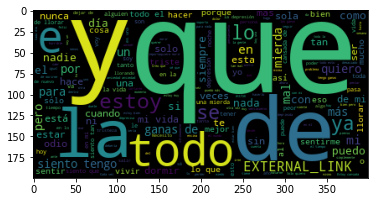

In [40]:
palabras = data.TWEET_TEXT.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

In [50]:
import re 

stopwords.extend(["Todo", "todo", "Dia", "día", "Miedo", "miedo"])

def pre_procesado(TWEET_TEXT):
    texto = TWEET_TEXT.lower()
    texto = re.sub(r"[\W\d_]+", " ", TWEET_TEXT)
    texto = [palabra for palabra in TWEET_TEXT.split() if palabra not in stopwords]
    texto = " ".join(TWEET_TEXT)
    return texto

data['pp'] = data.TWEET_TEXT.apply(lambda TWEET_TEXT: pre_procesado(TWEET_TEXT))

data.head()

,TWEET_ID_ANON,USER_ID_ANON,TWEET_TEXT,CREATED_AT,pp
373,374,33,"No soy nadie,\nNo he sido nadie\nY me voy a mo...",Thu Nov 16 02:08:35 +0000 2017,"N o s o y n a d i e , \n N o h e s i d..."
476,477,42,Nunca voy a olvidar cómo estaba mi mamá la pri...,Thu Mar 01 21:40:29 +0000 2018,N u n c a v o y a o l v i d a r c ó m ...
732,733,66,Otro día de mierda más.,Wed Dec 30 14:10:47 +0000 2015,O t r o d í a d e m i e r d a m á s .
648,649,57,"No exagero. Si me duele, me duele. Solo yo sie...",Thu Nov 02 06:41:10 +0000 2017,N o e x a g e r o . S i m e d u e l e ...
382,383,34,Mi mundo se esta desmoronando y ya no tengo fu...,Sat Feb 03 17:16:37 +0000 2018,M i m u n d o s e e s t a d e s m o r ...


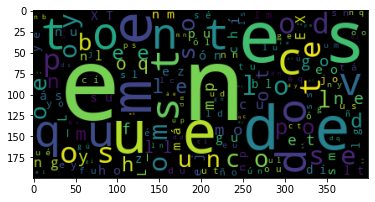

In [42]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()
## nose porq me las esta dejando  por  letra  y  no por palabras

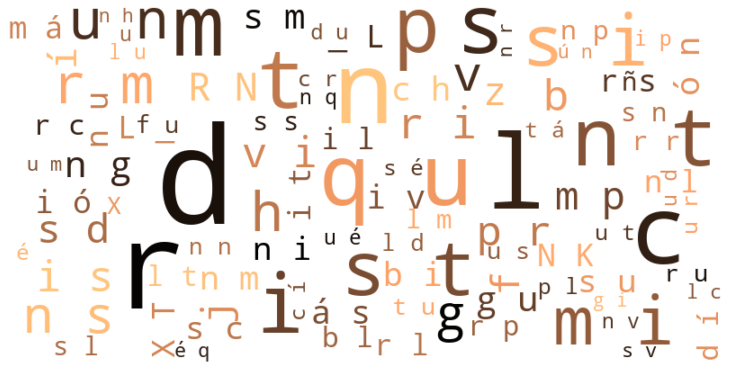

In [43]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="copper",
                      stopwords=stopwords, collocations=True).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()